In [41]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import *
import numpy as np
import time
from LowLevelModules.LakeShore import LakeShore335
from pymeasure.instruments.keithley import Keithley2400
# keithley stuff
keithley = Keithley2400("GPIB0::24::INSTR")   # 'ASRL9::INSTR' if RS232 connection
keithley.apply_current()                # Sets up to source voltage
keithley.source_current_range = .01      # Sets the source voltage range to 1 V
keithley.compliance_voltage = 0.5      # Sets the compliance current to 1 mA
keithley.source_current = 0    
keithley.measure_voltage()              # Sets up to measure voltage

#lakeshore stuff
lakeshore = LakeShore335('GPIB0::12::INSTR')
lakeshore.set_target_temperature(5)
lakeshore.turn_heater_off()

In [42]:
FS_LABEL = 20
FS_TICKS = 18
class LivePlot2Vert:
    def __init__(self, x_ext=12, y_ext=6, mk='o', xlabel1='x1', ylabel1='y1', xlabel2='x2', ylabel2='y2'):
        self.fig = plt.figure(figsize=(x_ext, y_ext))
        self.ax1 = self.fig.add_subplot(211)
        plt.plot([], [], marker=mk)
        plt.xlabel(xlabel1, labelpad=10, fontsize=FS_LABEL)
        plt.ylabel(ylabel1, labelpad=10, fontsize=FS_LABEL)
        self.ax1.tick_params(axis='both', labelsize=FS_TICKS)

        self.ax2 = self.fig.add_subplot(212)
        plt.plot([], [], marker=mk)
        plt.xlabel(xlabel2, labelpad=10, fontsize=FS_LABEL)
        plt.ylabel(ylabel2, labelpad=10, fontsize=FS_LABEL)
        self.ax2.tick_params(axis='both', labelsize=FS_TICKS)

        self.fig.show()
        self.fig.canvas.draw()
        plt.tight_layout()

    def plot_live(self, xdata1, ydata1, xdata2, ydata2):
        self.ax1.lines[0].set_xdata(xdata1)
        self.ax1.lines[0].set_ydata(ydata1)
        self.ax1.relim()
        self.ax1.autoscale_view()

        self.ax2.lines[0].set_xdata(xdata2)
        self.ax2.lines[0].set_ydata(ydata2)
        self.ax2.relim()
        self.ax2.autoscale_view()

        self.fig.canvas.draw()
        plt.pause(1e-7)

<IPython.core.display.Javascript object>


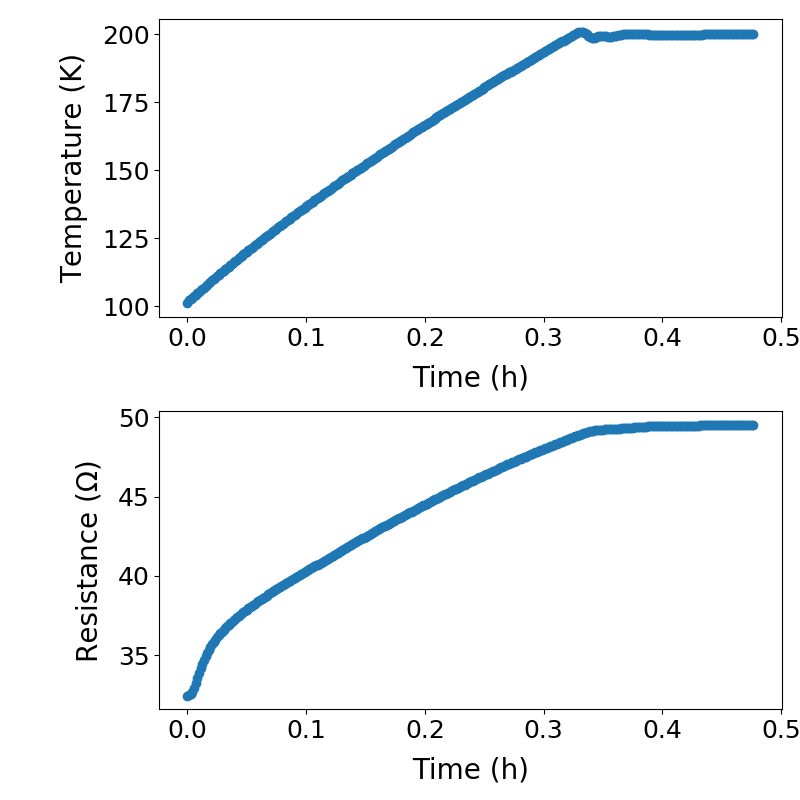

In [51]:
"""#######################################   USER INPUT   #################################################"""
save_data = True
collection_time = 5  #seconds

"""#########################################################################################################"""

# initialize the rest
lp = LivePlot2Vert(8, 8, 'o', 'Time (h)', 'Temperature (K)', 'Time (h)', 'Resistance (Ω)')
#lp.ax1.set_ylim([0, 300])
#lp.ax2.set_ylim([15, 65])
ti, Ta, Rs = [], [], []
t_now = 0

keithley.enable_source()
A = 0.001
keithley.ramp_to_current(A)                

while True:
    try:
        ti.append(t_now/3600)
        #measure the resistance
        Rs.append(keithley.voltage / A) 
        #measure the temperature
        Ta.append(lakeshore.get_temp("A"))
        print("T= "+ str(lakeshore.get_temp("A")) + " K.    R = ", keithley.voltage / A, end="\r")
        lp.plot_live(ti, Ta, ti, Rs)
        time.sleep(collection_time)
        t_now += collection_time
        #lp.ax1.legend(['Shield', 'Sample'], fontsize=20)

    except KeyboardInterrupt:
        break

keithley.disable_source()               

plt.show()
if save_data:
    data_type = 'Cryostat'
    data_header = "Time (hour)               Temp (K)                   Resistance (ohm)"
    data_array = np.array([ti, Ta, Rs]).T
    data_save(data_array, lp.fig, data_type, data_header)
    

In [6]:
keithley.shutdown()    

<IPython.core.display.Javascript object>


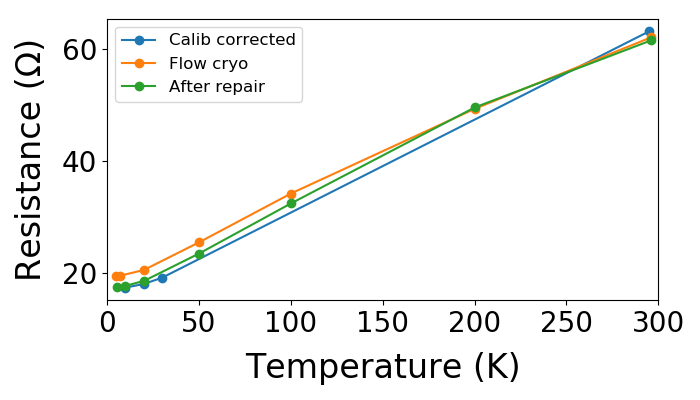

In [52]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import *
import numpy as np
#albert's data
T_calib = [10, 20, 30, 50, 70, 90, 120, 150, 180, 220, 260, 295]
R_calib = [17.438, 18.0835, 19.2077, 22.2651, 25.493, 28.5541, 32.9401, 37.2664, 41.5017, 46.9737, 52.46, 63.1214]
T_calib2 = [10, 20, 30, 295]
R_calib2 = [17.438, 18.0835, 19.2077, 63.1214]
#dfit = np.polyfit(T_calib, R_calib, 1)
#x = np.arange(0,300)
#p = np.poly1d(dfit)
#y_fit = p(x)
Temp = [5, 7, 20, 50, 100, 200, 296]
#Temp = [T + 5 for T in Temp]
Res = [19.49, 19.55, 20.57, 25.5, 34.2, 49.3, 62.04]
#Res = [R-2 for R in Res]
Temp_after_repair = [5.3, 9.7, 20.3, 50, 100, 200, 296]
Res_after_repair = [17.48, 17.71, 18.66, 23.5, 32.43, 49.54, 61.5]
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
#ax.plot(T_calib, R_calib, 'o-', label='Calib raw')
ax.plot(T_calib2, R_calib2, 'o-', label='Calib corrected')
#ax.plot(x, y_fit, 'r-')
ax.plot(Temp, Res, 'o-', label='Flow cryo')
ax.plot(Temp_after_repair, Res_after_repair, 'o-', label='After repair')
prettify_plot(ax, "Temperature (K)", "Resistance (Ω)")
ax.set_xlim([0, 300])
ax.legend(fontsize=12)
plt.tight_layout()